In [2]:
#first upload your data set
from google.colab import files
uploaded = files.upload()

Saving archive (3).zip to archive (3).zip


In [7]:
import zipfile
import os

# Unzip the uploaded file
with zipfile.ZipFile('archive (3).zip','r') as zip_ref:
    zip_ref.extractall('/content/fer2013')


In [8]:
train_dir = '/content/fer2013/train'
test_dir = '/content/fer2013/test'


In [9]:
import os

# List folders in train and test directories
print(os.listdir('/content/fer2013/train'))
print(os.listdir('/content/fer2013/test'))


['happy', 'sad', 'angry', 'disgust', 'fear', 'neutral', 'surprise']
['happy', 'sad', 'angry', 'disgust', 'fear', 'neutral', 'surprise']


In [10]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set paths to your dataset folders
train_dir = '/content/fer2013/train'
test_dir = '/content/fer2013/test'

# Image dimensions
img_width, img_height = 48, 48

# Data Preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,        # Normalize pixel values (0-1)
    shear_range=0.2,       # Random shear
    zoom_range=0.2,        # Random zoom
    horizontal_flip=True   # Randomly flip images
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Load images from directory structure
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='categorical'
)


Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [30]:
# Count images per category
train_counts = {}
for emotion in emotions:
    folder_path = os.path.join(train_dir, emotion)
    train_counts[emotion] = len(os.listdir(folder_path))

print("Number of training images per category:", train_counts)


NameError: name 'emotions' is not defined

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the CNN architecture
model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 2nd Convolutional Layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 3rd Convolutional Layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening
model.add(Flatten())

# Fully Connected Layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

# Output Layer (7 classes)
model.add(Dense(7, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 46, 46, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 356,423 (1.36 MB)

 Trainable params: 356,423 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=30,
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
897/897 ━━━━━━━━━━━━━━━━━━━━ 154s 168ms/step - accuracy: 0.2439 - loss: 1.8169 - val_accuracy: 0.3843 - val_loss: 1.5991
Epoch 2/30
  1/897 ━━━━━━━━━━━━━━━━━━━━ 1:28 98ms/step - accuracy: 0.3125 - loss: 1.6446

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


897/897 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.3125 - loss: 1.6446 - val_accuracy: 0.3862 - val_loss: 1.5967
Epoch 3/30
897/897 ━━━━━━━━━━━━━━━━━━━━ 149s 166ms/step - accuracy: 0.3736 - loss: 1.5960 - val_accuracy: 0.4629 - val_loss: 1.4008
Epoch 4/30
897/897 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.4688 - loss: 1.4700 - val_accuracy: 0.4636 - val_loss: 1.4013
Epoch 5/30
897/897 ━━━━━━━━━━━━━━━━━━━━ 148s 164ms/step - accuracy: 0.4290 - loss: 1.4728 - val_accuracy: 0.4842 - val_loss: 1.3592
Epoch 6/30
897/897 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.4062 - loss: 1.5168 - val_accuracy: 0.4851 - val_loss: 1.3591
Epoch 7/30
897/897 ━━━━━━━━━━━━━━━━━━━━ 203s 227ms/step - accuracy: 0.4648 - loss: 1.4094 - val_accuracy: 0.5141 - val_loss: 1.2715
Epoch 8/30
897/897 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.5000 - loss: 1.4352 - val_accuracy: 0.5123 - val_loss: 1.2745
Epoch 9/30
897/897 ━━━━━━━━━━━━━━━━━━━━ 201s 170ms/step - accuracy: 0.4826 - loss: 1.3534 - val_ac

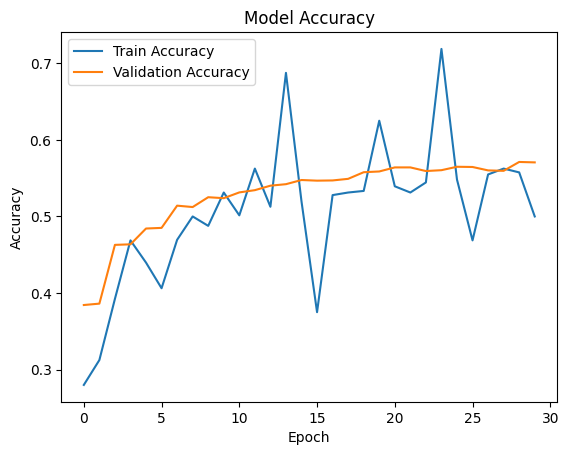

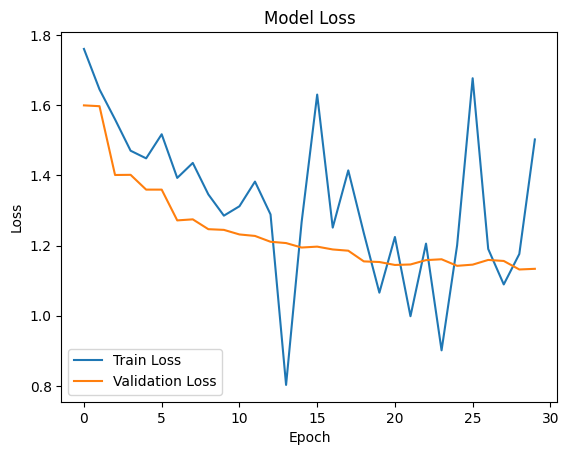

In [13]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [14]:
# Evaluate model on test data
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc*100:.2f}%")


225/225 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - accuracy: 0.5688 - loss: 1.1345
Test Accuracy: 57.08%


In [17]:
!pip install scikit-learn
import numpy as np
from sklearn.metrics import classification_report
import tensorflow as tf

# Assuming you want to predict on the test set
y_pred = np.argmax(model.predict(test_generator), axis=-1)
true_labels = test_generator.classes # Get true labels from the generator

print(classification_report(true_labels, y_pred, target_names=list(test_generator.class_indices.keys())))

225/225 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step
              precision    recall  f1-score   support

       angry       0.14      0.14      0.14       958
     disgust       0.00      0.00      0.00       111
        fear       0.15      0.08      0.10      1024
       happy       0.26      0.28      0.27      1774
     neutral       0.17      0.20      0.19      1233
         sad       0.15      0.15      0.15      1247
    surprise       0.13      0.15      0.14       831

    accuracy                           0.18      7178
   macro avg       0.14      0.14      0.14      7178
weighted avg       0.17      0.18      0.17      7178



In [19]:
model.save("emotion_model.h5")


In [20]:
from tensorflow.keras.models import load_model
model = load_model("emotion_model.h5")


In [26]:
from google.colab import files
uploaded = files.upload()

Saving face2.jpg to face2.jpg


In [28]:
import cv2
import numpy as np

# Load image
img = cv2.imread("face2.jpg") # Load in color

# Preprocess
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # Convert to grayscale if needed
img = cv2.resize(img, (48, 48))
img = img.reshape(1, 48, 48, 1) # Reshape for the model
img = img / 255.0 # Normalize

# Check if the model expects 3 channels (color)
if model.input_shape[-1] == 3:
    img = np.repeat(img, 3, axis=-1)  # Repeat grayscale to 3 channels


# Predict emotion
prediction = model.predict(img)
emotion_class = np.argmax(prediction)

# Map class number to emotion name
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
print("Predicted Emotion:", emotion_labels[emotion_class])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
Predicted Emotion: Happy
